# Atividade Final – Feature Engineering
7DTSR / feature engineering / filipe sousa pacheco de almeida
- Carol Lavecchia – RM 354620
- Mateus Stoppa - RM 355040

## 1. Realizando a importação das bibliotecas

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## 2. Lendo a base de dados em CSV

In [30]:
df = pd.read_csv('datasets\Base_ScoreCredito_QuantumFinance.csv', delimiter=';')
df.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,"40,089665024322",3,0,0,1,1,778
1,708083283,58,M,solteiro,ensino fundam,0,44,1,"66,557645274838",3,0,0,1,0,"276,3"
2,708084558,46,M,divorciado,doutorado,3,35,1,"123,68182089138",6,0,0,1,1,401
3,708085458,34,F,solteiro,mestrado,0,22,1,"19,7159343168329",6,0,0,1,0,"347,4"
4,708086958,49,F,casado,mestrado,2,36,0,0,3,1,437,1,2,476


## 3. Tratando as variáveis

### Verificando como estão as variáveis logo após a leitura do dataset

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10127 non-null  int64 
 1   idade                10127 non-null  int64 
 2   sexo                 10127 non-null  object
 3   estado_civil         10127 non-null  object
 4   escola               10127 non-null  object
 5   Qte_dependentes      10127 non-null  int64 
 6   tempo_ultimoservico  10127 non-null  int64 
 7   trabalha             10127 non-null  int64 
 8   vl_salario_mil       10127 non-null  object
 9   reg_moradia          10127 non-null  int64 
 10  casa_propria         10127 non-null  int64 
 11  vl_imovel_em_mil     10127 non-null  int64 
 12  Qte_cartoes          10127 non-null  int64 
 13  Qte_carros           10127 non-null  int64 
 14  SCORE_CREDITO        10127 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


### Avaliando a presença de valores nulos realizando a manipulação dos dados

In [32]:
pd.DataFrame(zip(df.isnull().sum(),df.isnull().sum()/len(df)), columns=['Count', 'Proportion'], index=df.columns)

,Count,Proportion
id,0,0.0
idade,0,0.0
sexo,0,0.0
estado_civil,0,0.0
escola,0,0.0
Qte_dependentes,0,0.0
tempo_ultimoservico,0,0.0
trabalha,0,0.0
vl_salario_mil,0,0.0
reg_moradia,0,0.0


### Tratando as colunas não numéricas e as numéricas fora do formato correto

In [33]:
df.drop(columns=['id'], inplace=True)

In [34]:
print(df['sexo'].unique())
print(df['estado_civil'].unique())
print(df['escola'].unique())

['F' 'M']
['casado' 'solteiro' 'divorciado' 'na']
['graduacao' 'ensino fundam' 'doutorado' 'mestrado' 'ensino medio']


In [35]:
df['sexo'] = (
    df['sexo']
    .astype('string')
)

df['estado_civil'] = (
    df['estado_civil']
    .astype('string')
    .str.replace('na', df['estado_civil'].mode()[0], regex=False) # substituindo pela moda: df['estado_civil'].mode() -> casado
)

df['escola'] = (
    df['escola']
    .astype('string')
)

df['vl_salario_mil'] = ( # tratando as vírgulas e transformando para int
    df['vl_salario_mil']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.replace(r'[ ]', '', regex=True)
    .astype(float)
    .astype('int64')
)

df['SCORE_CREDITO'] = ( # tratando as vírgulas e transformando para int
    df['SCORE_CREDITO']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.replace(r'[ ]', '', regex=True)
    .astype(float)
    .astype('int64')
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   idade                10127 non-null  int64 
 1   sexo                 10127 non-null  string
 2   estado_civil         10127 non-null  string
 3   escola               10127 non-null  string
 4   Qte_dependentes      10127 non-null  int64 
 5   tempo_ultimoservico  10127 non-null  int64 
 6   trabalha             10127 non-null  int64 
 7   vl_salario_mil       10127 non-null  int64 
 8   reg_moradia          10127 non-null  int64 
 9   casa_propria         10127 non-null  int64 
 10  vl_imovel_em_mil     10127 non-null  int64 
 11  Qte_cartoes          10127 non-null  int64 
 12  Qte_carros           10127 non-null  int64 
 13  SCORE_CREDITO        10127 non-null  int64 
dtypes: int64(11), string(3)
memory usage: 1.1 MB


## 4. Analisando as variáveis

### Analisando a média, desvio e quartis das variáveis numéricas

In [36]:
df.describe().round(2)

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.0,10127.00,10127.00,10127.00
mean,46.33,1.55,34.13,0.91,69.76,3.78,0.35,209.0,1.08,0.62,469.29
std,8.02,1.49,8.22,0.28,55.51,1.58,0.48,378.5,0.33,0.57,133.84
min,26.00,0.00,7.00,0.00,0.00,1.00,0.00,0.0,1.00,0.00,162.00
25%,41.00,0.00,30.00,1.00,21.00,3.00,0.00,0.0,1.00,0.00,375.00
50%,46.00,1.00,34.00,1.00,66.00,4.00,0.00,0.0,1.00,1.00,449.00
75%,52.00,3.00,39.00,1.00,107.00,5.00,1.00,289.0,1.00,1.00,540.00
max,73.00,5.00,57.00,1.00,233.00,6.00,1.00,1800.0,4.00,2.00,979.00


### Analisando as variáveis preditoras vs. a variável target (SCORE_CREDITO):

Analisando os gráficos de dispersão das variáveis numéricas vs a variável target.  
Podemos observar os dados bem distribuídos, com correlações leves a moderadas. As variáveis de salário e de valor do imóvel apresentam os dados aglomerados em algumas regiões.

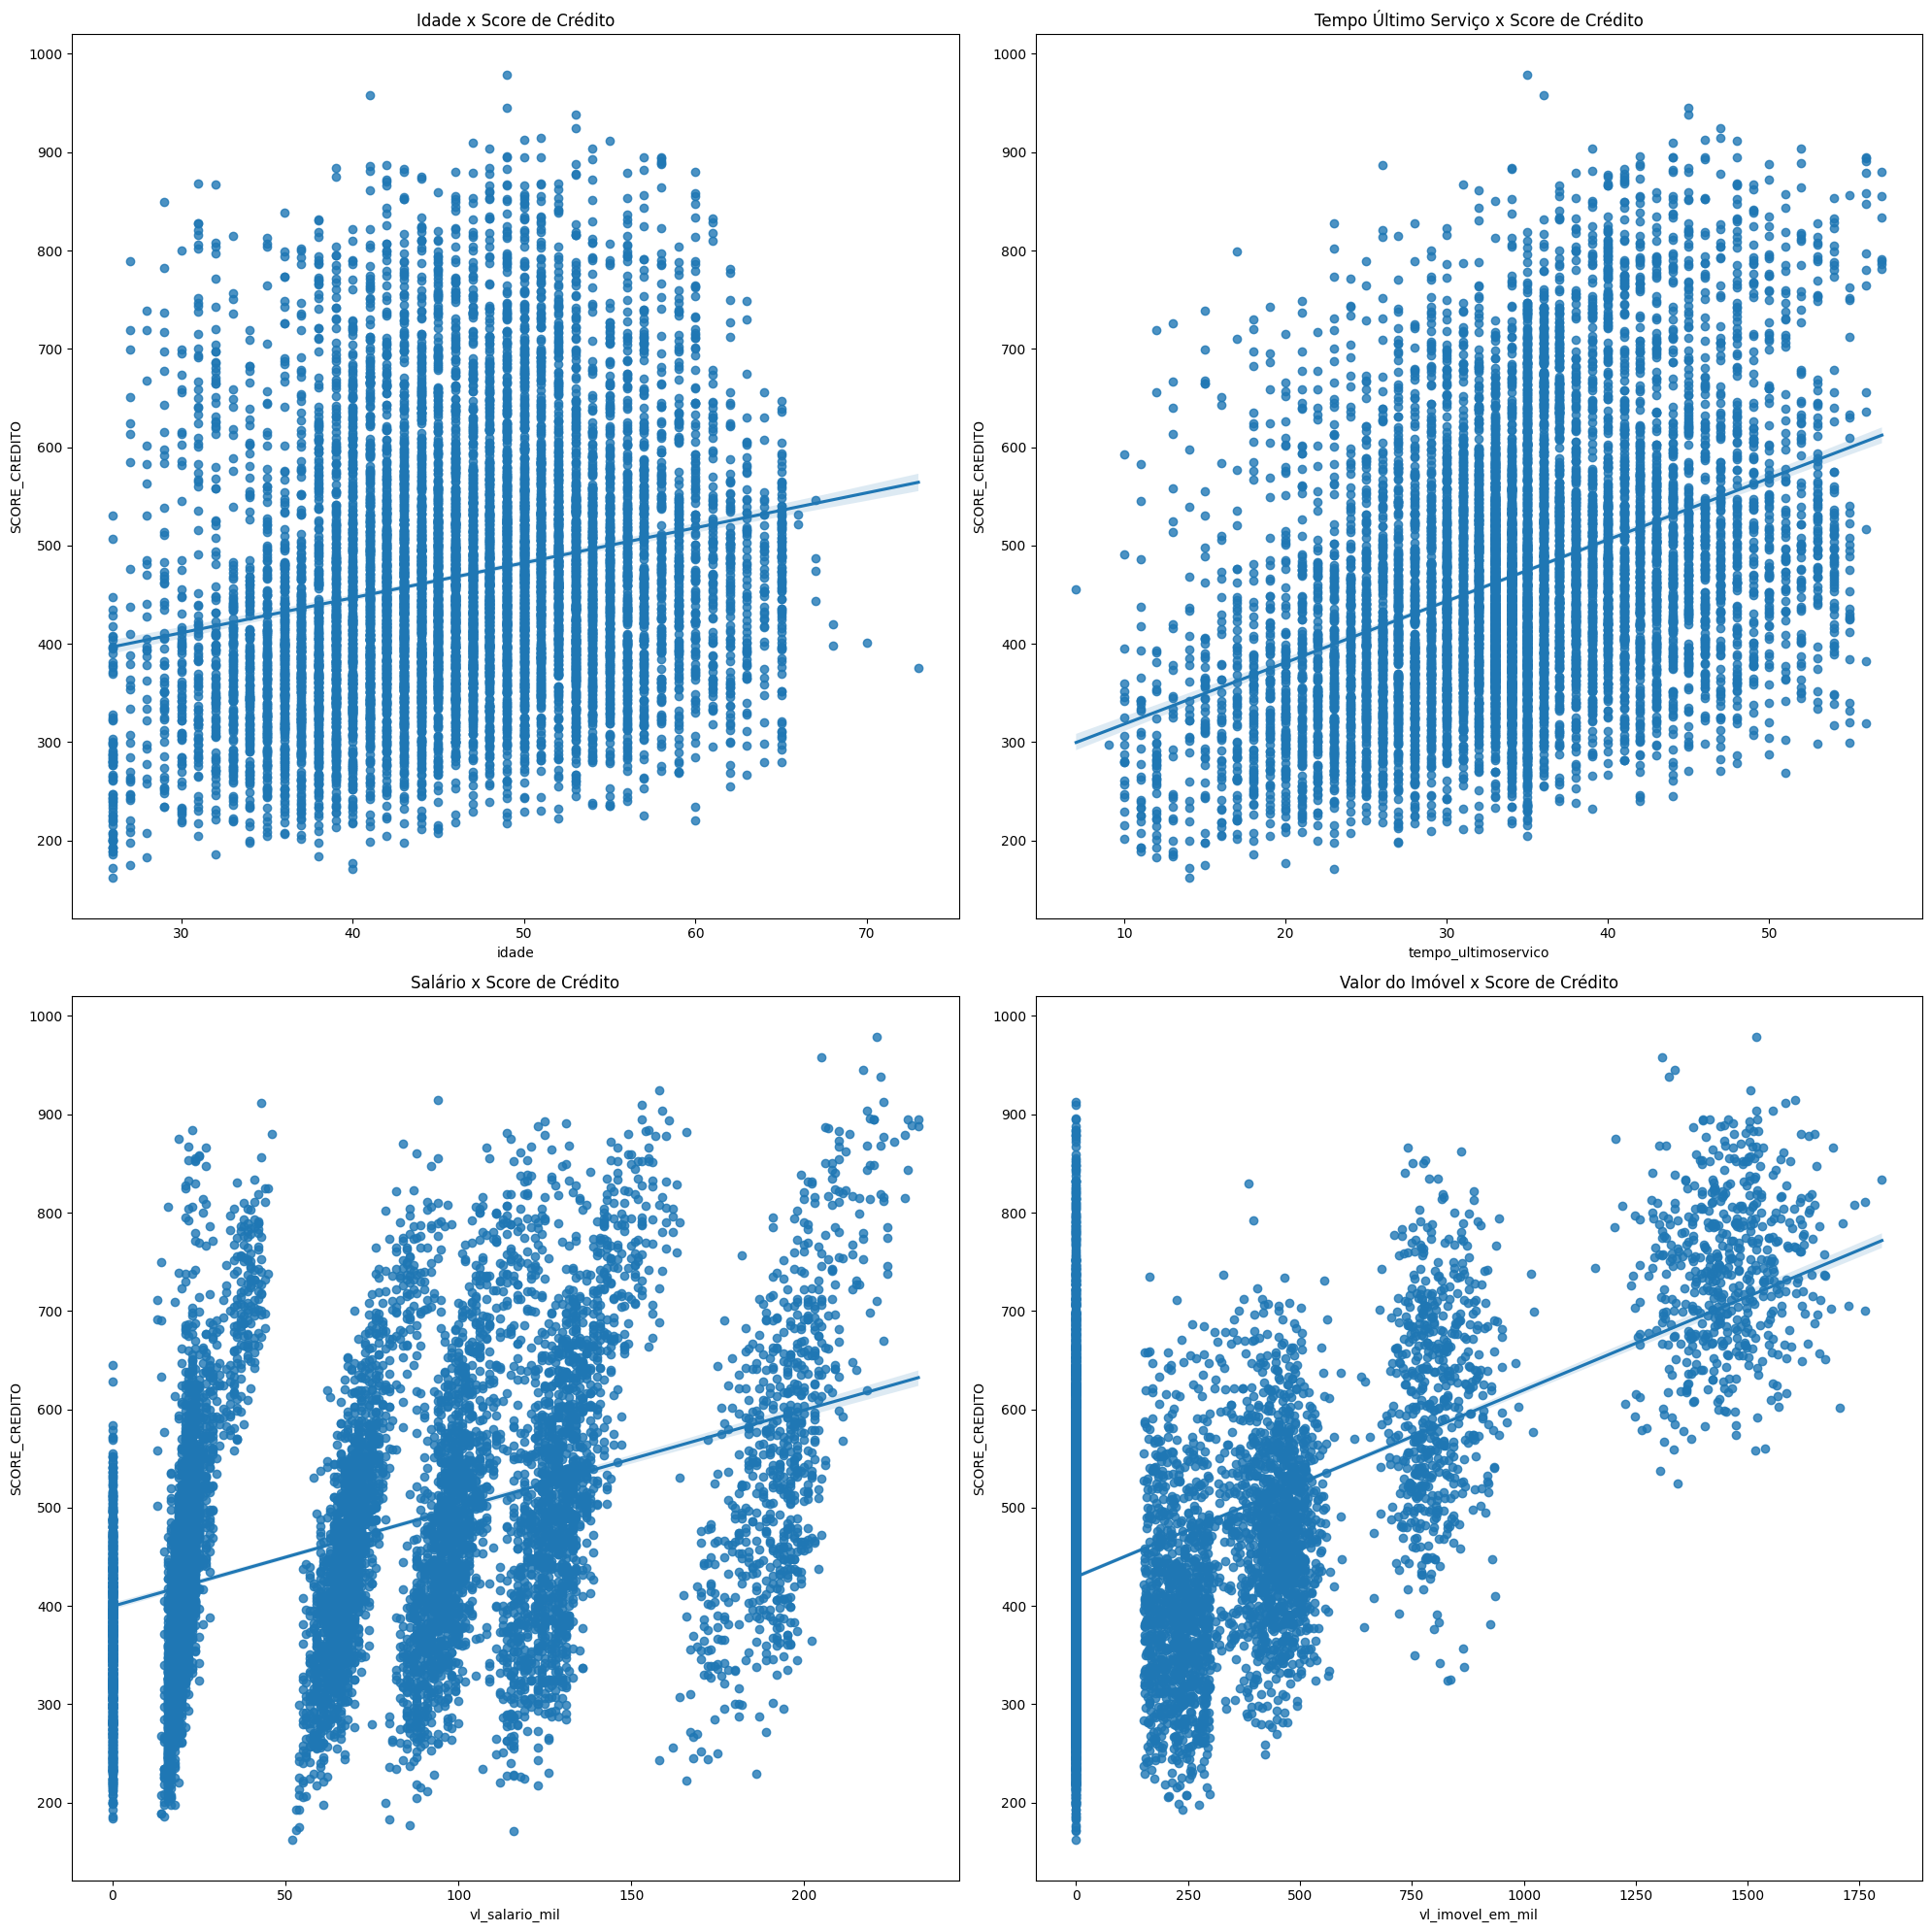

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

sns.regplot(x=df.idade, y=df.SCORE_CREDITO, data=df, fit_reg=True, ax=axes[0, 0])
axes[0, 0].set_title("Idade x Score de Crédito")

sns.regplot(x=df.tempo_ultimoservico, y=df.SCORE_CREDITO, data=df, fit_reg=True, ax=axes[0, 1])
axes[0, 1].set_title("Tempo Último Serviço x Score de Crédito")

sns.regplot(x=df.vl_salario_mil, y=df.SCORE_CREDITO, data=df, fit_reg=True, ax=axes[1, 0])
axes[1, 0].set_title("Salário x Score de Crédito")

sns.regplot(x=df.vl_imovel_em_mil, y=df.SCORE_CREDITO, data=df, fit_reg=True, ax=axes[1, 1])
axes[1, 1].set_title("Valor do Imóvel x Score de Crédito")

plt.tight_layout()
plt.show()

### Boxplot da variável target com as variáveis categóricas

Fazer um boxplot da variável target para cada categoria de uma variável categórica ajuda a entender a distribuição da variável target, identificar diferenças entre categorias e detectar outliers.

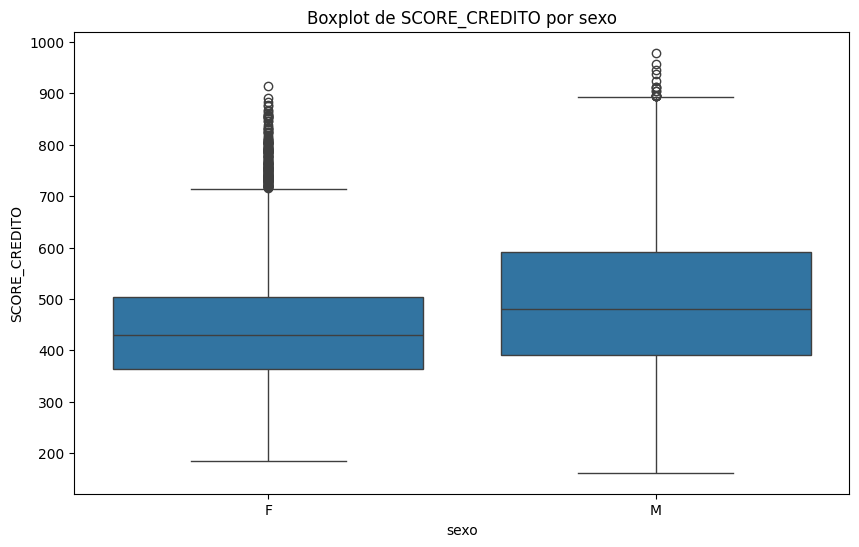

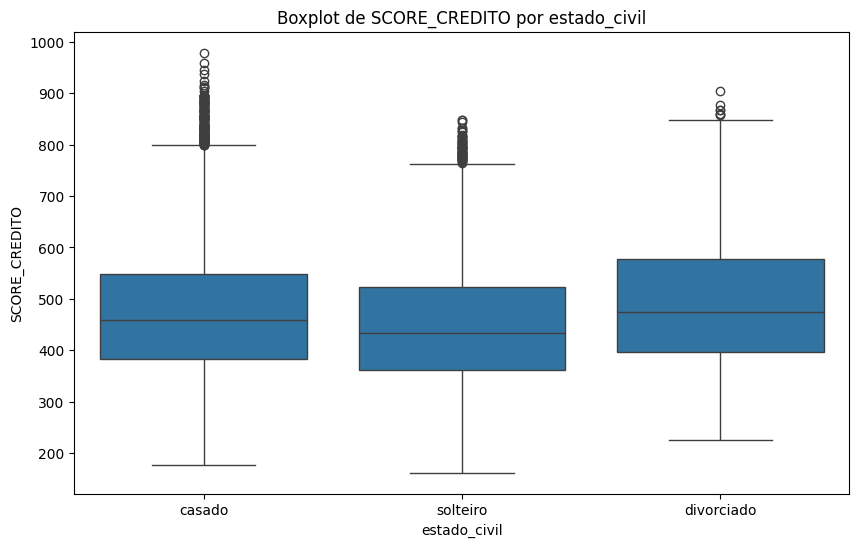

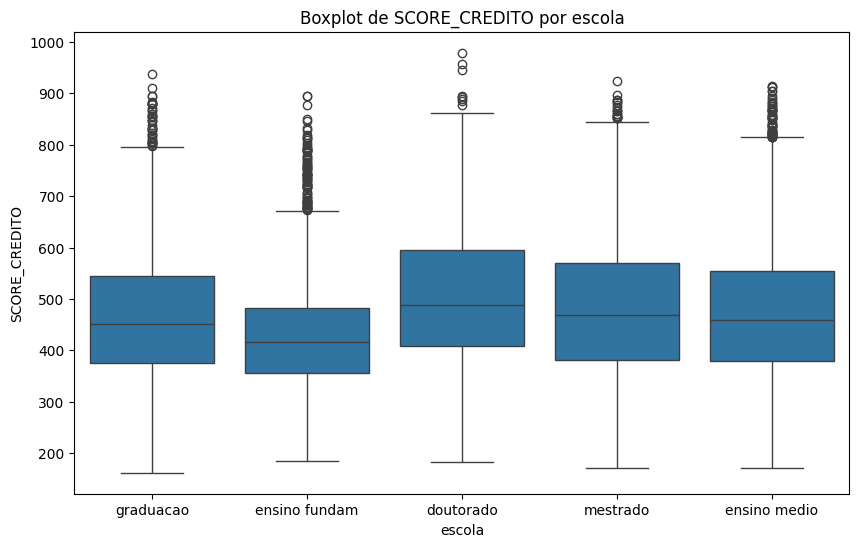

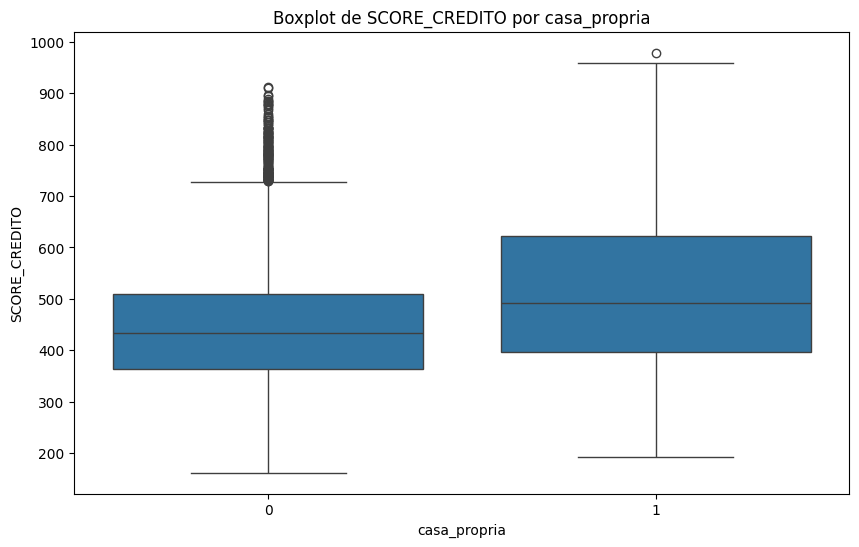

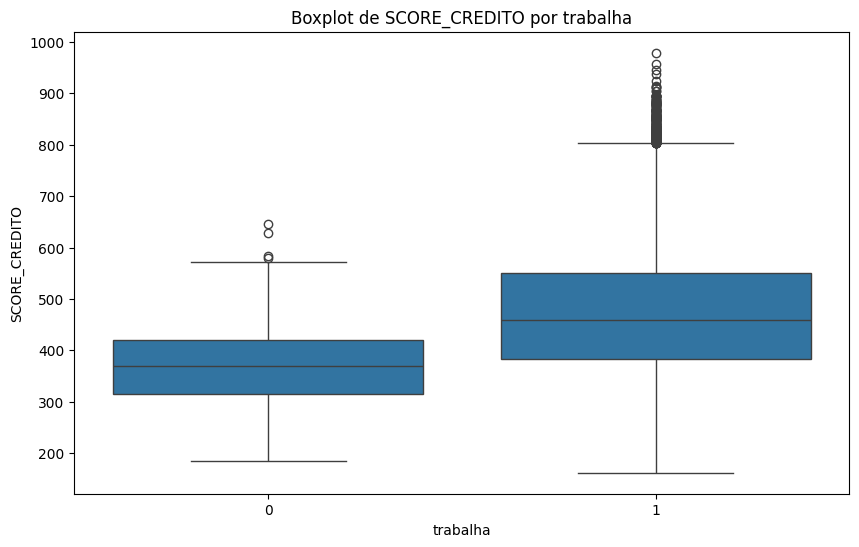

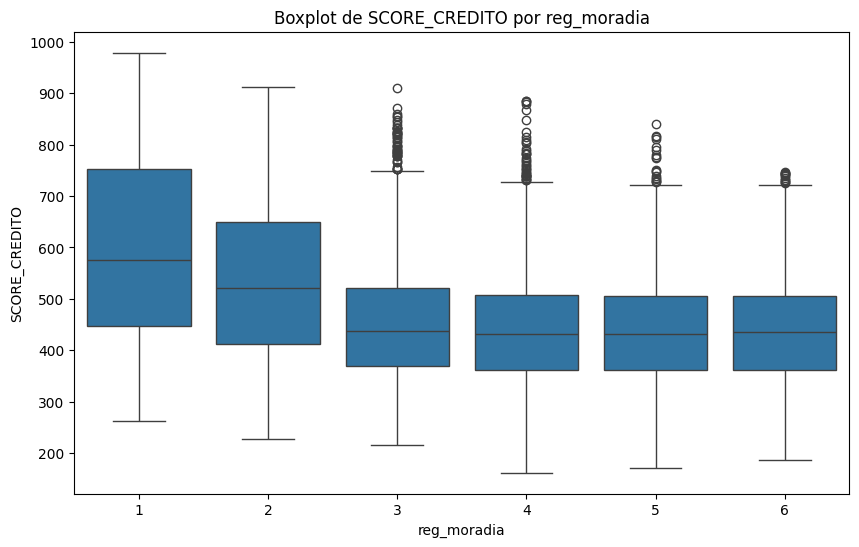

In [38]:
variaveis_categoricas = ['sexo', 'estado_civil', 'escola', 'casa_propria', 'trabalha', 'reg_moradia']

for variavel in variaveis_categoricas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=variavel, y='SCORE_CREDITO', data=df)
    plt.title(f'Boxplot de SCORE_CREDITO por {variavel}')
    plt.show()

##### Conclusão outliers:
A análise dos boxplots não mostra a presença de outliers significativos, os dados parecem estar homogêneos. Por isso não foi realizado nenhum tratamento específico de outliers para esses dados.

## 5. Analisando o coeficiente de correlação de Pearson entre as variáveis

Vamos analisar a correlação entre as variáveis para identificar o quanto e em qual direção as variáveis estão correlacionadas. Isso pode nos ajudar a identificar tendências que não são facilmente visualizadas nos gráficos.

Podemos observar que as variáveis com correlação mais fortes com score de crédito são valor do imóvel, valor do salário, tempo do último serviço, quantidade de cartões e região da moradia.  
Quanto a correlação entre essas variáveis, todas tem apenas correlação leve entre elas (no máximo 0,16)

<Axes: >

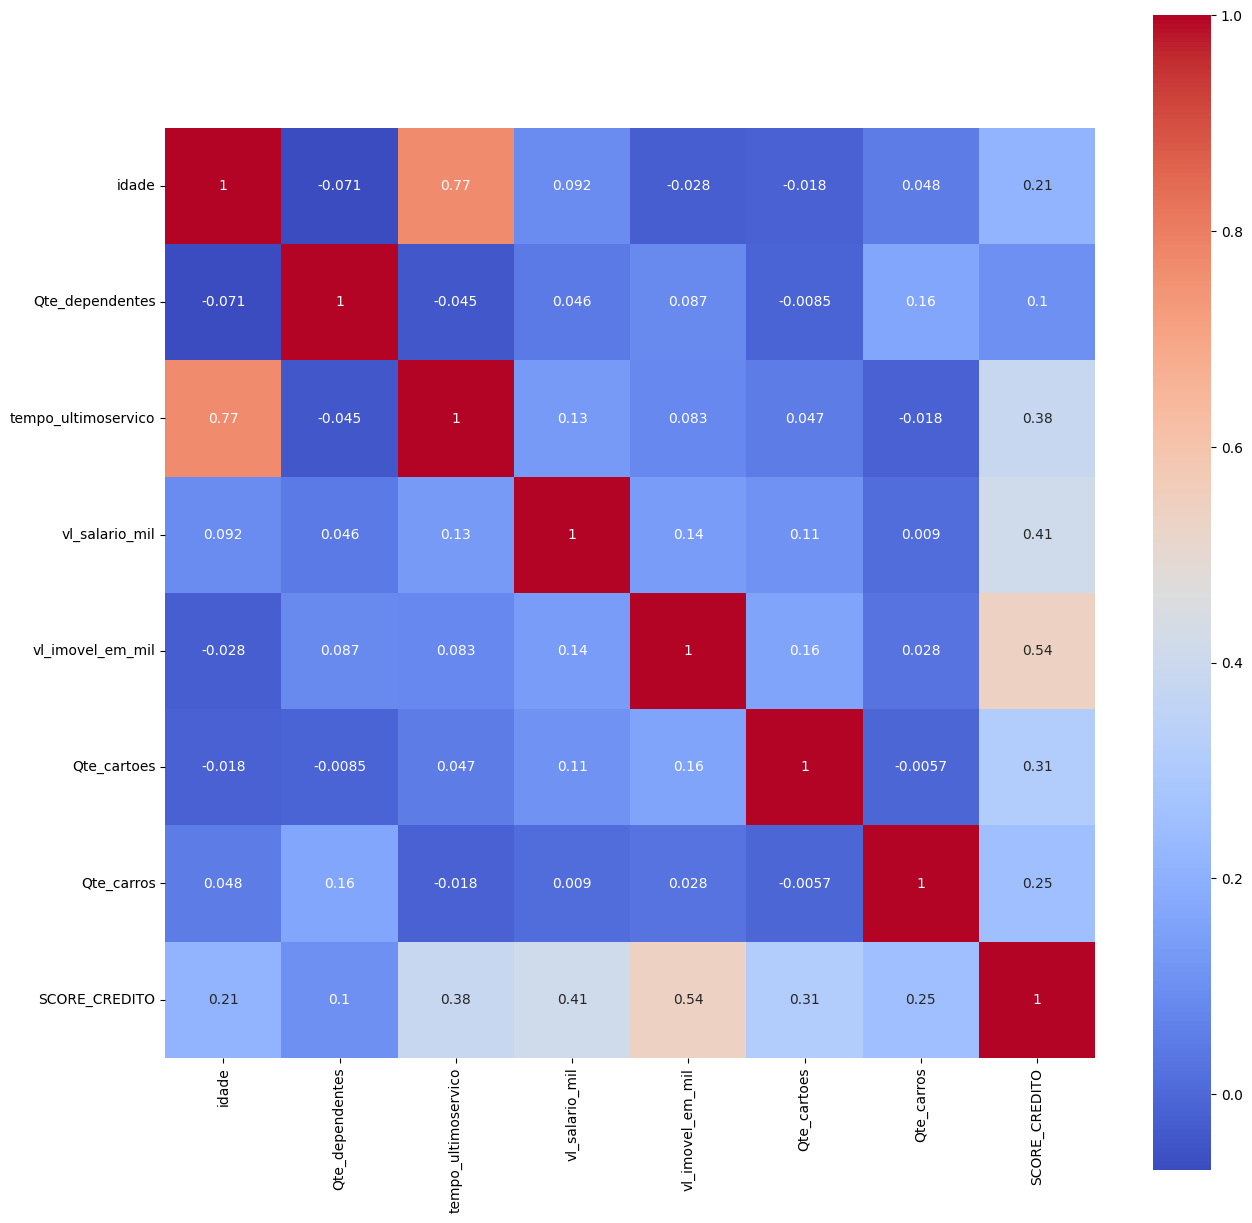

In [39]:
df_num = df.drop(columns=['sexo', 'estado_civil', 'escola', 'casa_propria', 'trabalha', 'reg_moradia']) # Removendo variáveis não numéricas
correlation = df_num.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='coolwarm')

## 6. Foi aplicado o Ordinal Encoding com o campo escola

Escolaridade: com base no resultado, rejeitamos a hipótese nula de que não há associação entre as variáveis. Então as variáveis estão correlacionadas, mas a correlação é fraca.

### Foi aplicado o Ordinal Encoding com o campo escola

In [40]:
df_qq = df[['escola','SCORE_CREDITO']].copy()

df_qq['escola'] = (
    df_qq['escola']
    .astype(str)
    .str.replace('ensino fundam', '1', regex=False)
    .str.replace('ensino medio', '2', regex=False)
    .str.replace('graduacao', '3', regex=False)
    .str.replace('mestrado', '4', regex=False)
    .str.replace('doutorado', '5', regex=False)
    .astype('int64')
)

Q1 =  np.percentile(df_qq['SCORE_CREDITO'], 25)
Q2 =  np.percentile(df_qq['SCORE_CREDITO'], 50)
Q3 =  np.percentile(df_qq['SCORE_CREDITO'], 75)
maximo = max(df_qq['SCORE_CREDITO'])
print(Q1, Q2, Q3, maximo)

df_qq.loc[(df_qq.SCORE_CREDITO >= 0) & (df_qq.SCORE_CREDITO <= Q1), 'faixa_score']=1.0
df_qq.loc[(df_qq.SCORE_CREDITO > Q1) & (df_qq.SCORE_CREDITO <= Q2), 'faixa_score']=2.0
df_qq.loc[(df_qq.SCORE_CREDITO>  Q2)  & (df_qq.SCORE_CREDITO <=Q3), 'faixa_score']=3.0
df_qq.loc[(df_qq.SCORE_CREDITO >  Q3) & (df_qq.SCORE_CREDITO <= maximo), 'faixa_score']=4.0

results_escolaridade = researchpy.crosstab(df_qq['faixa_score'], df_qq['escola'], test='chi-square')

print(results_escolaridade)

375.0 449.0 540.0 979
(            escola                              
escola           1     2     3     4    5    All
faixa_score                                     
1.0            740   796   516   379  130   2561
2.0            678   796   520   355  154   2503
3.0            584   831   519   394  210   2538
4.0            281   929   539   511  265   2525
All           2283  3352  2094  1639  759  10127,                  Chi-square test   results
0  Pearson Chi-square ( 12.0) =   324.7658
1                     p-value =     0.0000
2                  Cramer's V =     0.1034)


### Foi aplicado o Ordinal Encoding convertendo os campos 'SEXO' e 'ESTADOCIVIL' para numérico

In [41]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoded = ordinal_encoder.fit_transform(df[['sexo', 'estado_civil']])

In [42]:
# Convertendo o resultado para um DataFrame
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=['sexo', 'estado_civil'])
ordinal_encoded_df.head()

,sexo,estado_civil
0,0.0,0.0
1,1.0,2.0
2,1.0,1.0
3,0.0,2.0
4,0.0,0.0


## 7. Próximas Etapas

- Divisão da base entre treino e teste  
- Treino do modelo e predição do Score de crédito  
- Análise da qualidade do modelo (análise de resíduos, acurácia e medidas de erro)  
- Simulação da aplicação do algoritmo final

Dados preparados para futuramente serem utilizados por um modelo de Machine Learning para realizar predições a respeito do Score.